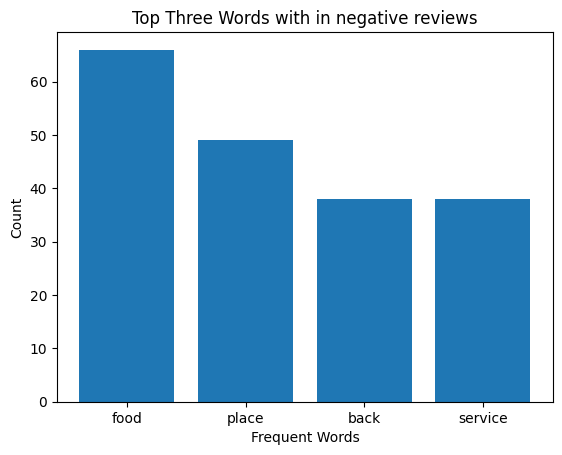

In [2]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# Filter the dataset to keep only the negative reviews (label 0)
negative_reviews = dataset[dataset['Liked'] == 0]['Review'].tolist()

# Preprocess the negative reviews
corpus = []
for review in negative_reviews:
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer() # It will be used to perform stemming on the words in the review.
    all_stopwords = stopwords.words('english') #This line retrieves the list of English stopwords from NLTK
    review = [word for word in review if word not in set(all_stopwords)] #This line uses a list comprehension to perform stemming on each word in the review, excluding the words that are present in the all_stopwords list. 
    review = ' '.join(review) #This line joins the list of stemmed words back into a single string, where each word is separated by a space.
    corpus.append(review) #This line adds the processed review to the corpus list. 

# Concatenate all the reviews into a single string
all_reviews = ' '.join(corpus)

# Tokenize the string into words
words = all_reviews.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the most common words and their counts
top_words = word_counts.most_common(4)



# Extract the words and their counts
words, counts = zip(*top_words)

# Create a bar plot of the top three words
plt.bar(words, counts)
plt.xlabel('Frequent Words')
plt.ylabel('Count')
plt.title('Top Three Words with in negative reviews')
plt.show()

